In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
train=pd.read_csv('/Users/andersongannaway/Desktop_/Python/titanic_train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [79]:
#find where data is missing
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


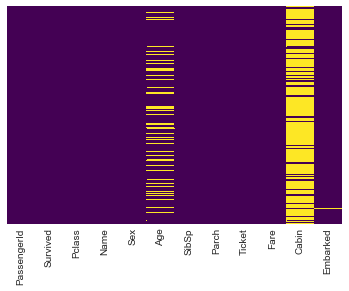

In [83]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #heat map of boolean values

Analysis: need to fill age with dummies; cabin has too much missing data to do anything with, so I probably can't use it

In [9]:
sns.set_style('whitegrid')

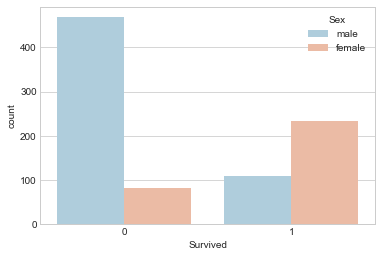

In [84]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r') #most males died

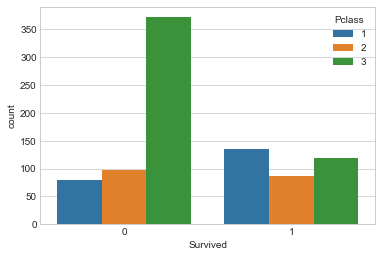

In [16]:
sns.countplot(x='Survived',data=train,hue='Pclass') #most third class passengers died

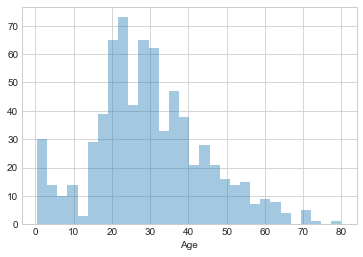

In [18]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30) #bimodal distribution

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


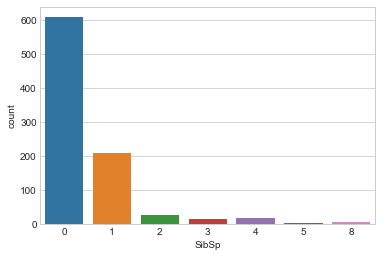

In [21]:
sns.countplot('SibSp',data=train) #most passengers did not have children or spouse

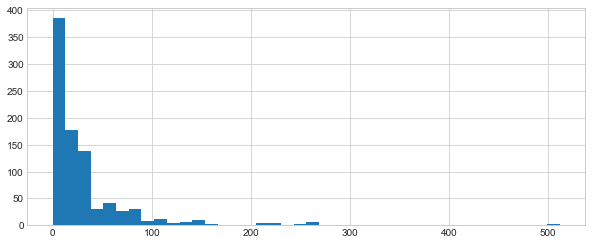

In [25]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [26]:
#create interactive plotly chart
import cufflinks as cf
cf.go_offline()

In [27]:
train['Fare'].iplot(kind='hist')

# Clean Data

imputation: fill in missing values with mean data

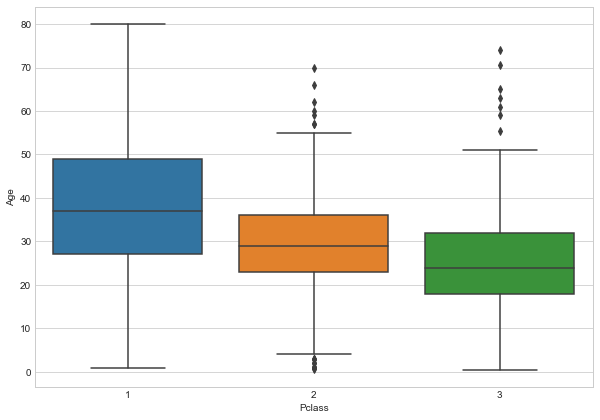

In [47]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train) #fist class age is higher than other classes

In [48]:
#imputation function
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [49]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

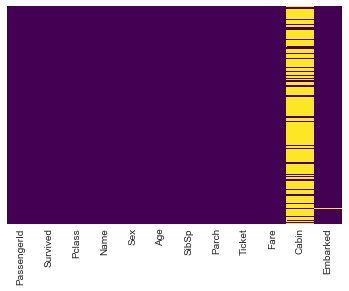

In [50]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
train.drop('Cabin',axis=1,inplace=True) #get rid of cabin col

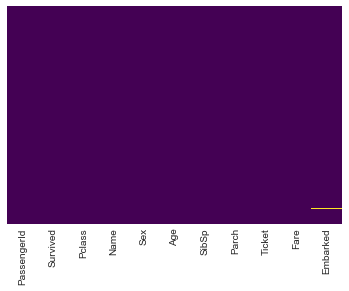

In [52]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

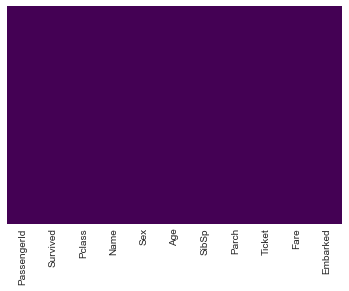

In [54]:
train.dropna(inplace=True) #fill embarked col's missing value
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #nothing is missing now

Now convert categorical features to numerical features called dummy variables

In [55]:
sex=pd.get_dummies(train['Sex'],drop_first=True) 
#problem is multicolinearity, one col is perfect predictor of other col, so use drop_first = True

In [56]:
embark=pd.get_dummies(train['Embarked'],drop_first=True) #two are not perfect predictors, but three are
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
train=pd.concat([train,sex,embark],axis=1)#axis = 1 adds in as new cols

In [ ]:
train.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [62]:
train.drop(['PassengerId'],axis=1,inplace=True)
#could also use get_dummies for Pclass

# Train Test Split

In [63]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [64]:
from sklearn.cross_validation import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
from sklearn.linear_model import LogisticRegression
lgmdl=LogisticRegression()

In [67]:
lgmdl.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
pred=lgmdl.predict(X_test)
pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))


             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)


array([[148,  15],
       [ 36,  68]])